In [1]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as td
import torch.nn.functional as F
import torchvision as tv
from PIL import Image
import nntools as nt
import matplotlib.pyplot as plt
from dataloader import VOCDataset, myimshow
import model

class statsmanager(nt.StatsManager):
    def __init__self():
        super(statsmanager,self).__init__()

    def init(self):
        super(statsmanager,self).init()
        self.m_ap=0

    def accumulate(self,loss,x,y,d):
        #Do m_ap calculations
        super(statsmanager,self).accumulate(loss,x,y,d)


    def summarize(self):
        loss=super(statsmanager,self).summarize()
        return {'loss':loss}

def plot(self,fig,ax1, ax2 ,im):
    ax1.set_title('Image')
    x,y=train_set[0]
    myimshow(x,ax=ax1)
    ax2.set_title('Loss')
    ax2.plot([self.history[k]['loss']for k in range(self.epoch)])
    plt.tight_layout()
    fig.canvas.draw()

cuda
512


<IPython.core.display.Javascript object>


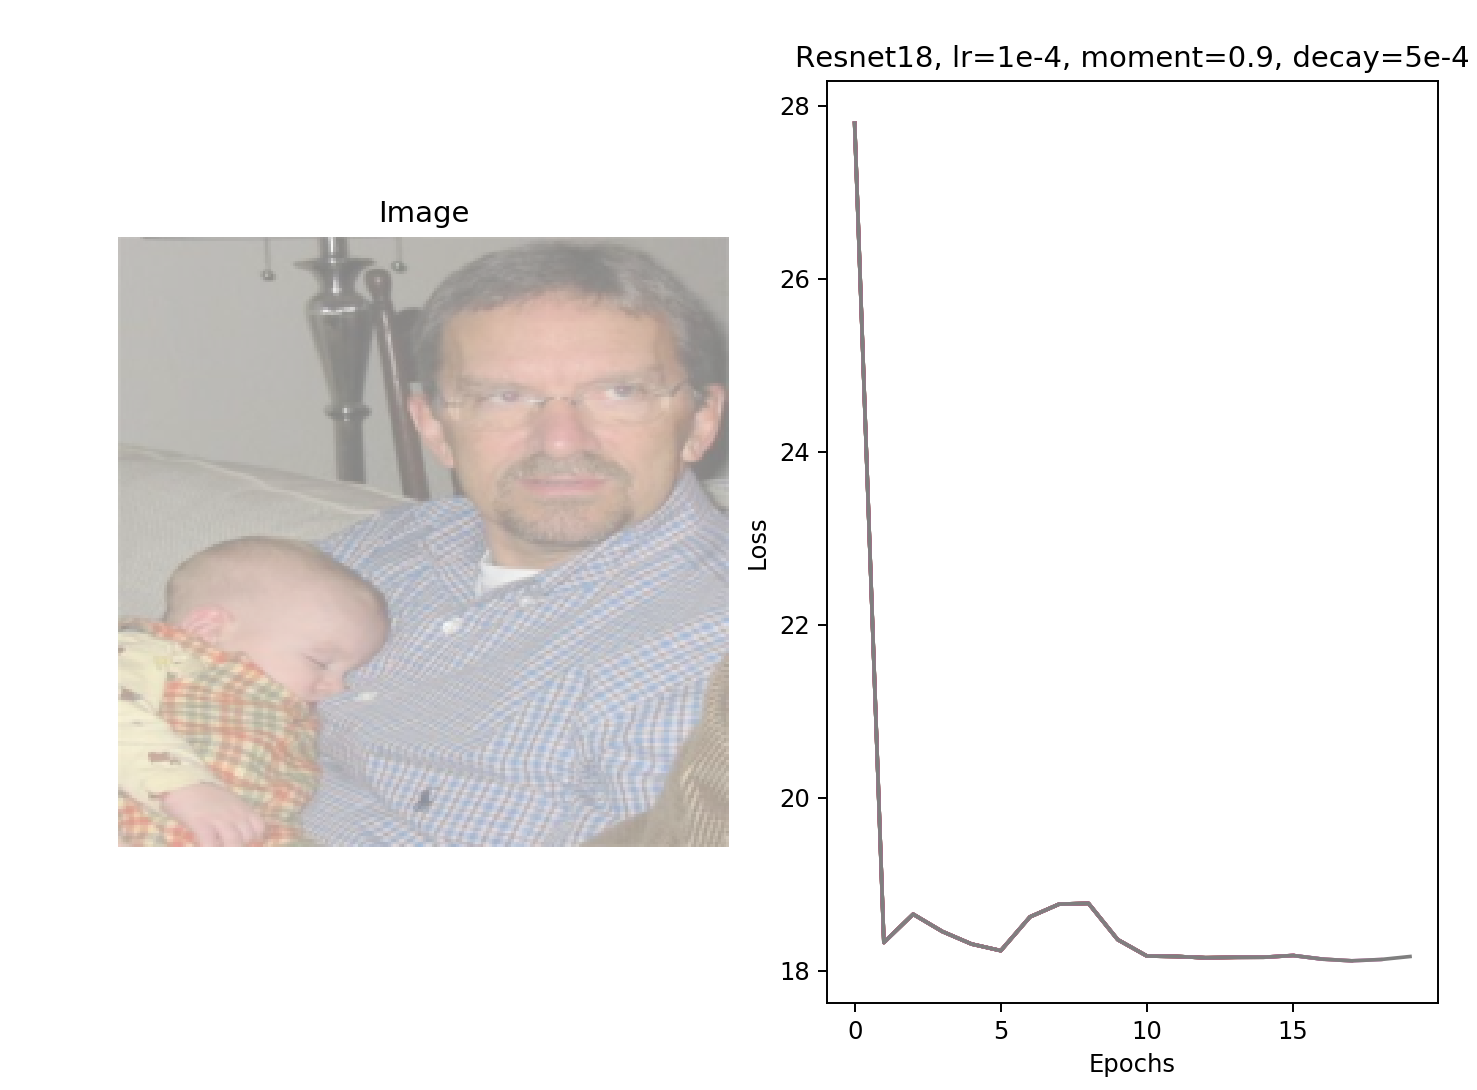

In [2]:
lr=1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
resnet3 = model.Resnet18Transfer(num_classes=20,n_batch=4)

## UNCOMMENT the following line if training.  Leave comment if loading trained network.
## Do this so that the GPU is left free for subsequent nets to train.

resnet3.to(device)

#adam=torch.optim.Adam(resnet3.parameters(),lr=lr)
sgd=torch.optim.SGD(resnet3.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp_resnet3=nt.Experiment(resnet3,train_set,valid_set,sgd,stats_manager,batch_size=64,output_dir="runressgdloss",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)


In [3]:
exp_resnet3.run(num_epochs=20,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

Start/Continue training from epoch 13


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 14 (Time: 198.20s)
Epoch 15 (Time: 202.61s)
Epoch 16 (Time: 204.49s)
Epoch 17 (Time: 200.81s)
Epoch 18 (Time: 204.47s)
Epoch 19 (Time: 197.33s)
Epoch 20 (Time: 198.49s)
Finish training for 20 epochs


In [3]:
exp_resnet3.history

[{'loss': 27.797154049184872}]

In [5]:
ax2.set_title('Resnet18, lr=1e-4, moment=0.9, decay=5e-4')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')

Text(0.5, 36.56681134259262, 'Epochs')

In [4]:
exp_resnet3.history
#exp1.evaluate()

[{'loss': 12431.979155088458},
 {'loss': 4033.319439978402},
 {'loss': 1061.5154747701934},
 {'loss': 432.7415122629326},
 {'loss': 384.1639989132238},
 {'loss': 123.83292457672242},
 {'loss': 153.92180064650816},
 {'loss': 77.3882808812629},
 {'loss': 95.76520231728242},
 {'loss': 308.9188926605102},
 {'loss': 76.7679353263254},
 {'loss': 75.4170515317624},
 {'loss': 74.05968562433016},
 {'loss': 74.06956670376583},
 {'loss': 251.61676915147117},
 {'loss': 74.11212728625146},
 {'loss': 74.05324396049387},
 {'loss': 74.03795040115337},
 {'loss': 74.04707962362089},
 {'loss': 74.05773369110474},
 {'loss': 74.06104982424483},
 {'loss': 74.06108012791469},
 {'loss': 75.78211078720194},
 {'loss': 74.0480674519558},
 {'loss': 74.06645850473157},
 {'loss': 74.04595660017392},
 {'loss': 74.07006641892151},
 {'loss': 74.06631413193666},
 {'loss': 74.06980310294911},
 {'loss': 74.06347820755636}]

In [5]:
## Try transferring lr=1e-3 net to a new experiment with lr=1e-4

# First, make space on the GPU by moving the old net off
#resnet3.to('cpu')

lr=1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
oldnet = exp_resnet3.setting()['Net']
resnet4 = model.Resnet18Custom(oldnet, num_classes=20,n_batch=4)

## UNCOMMENT the following line if training.  Leave comment if loading trained network.
## Do this so that the GPU is left free for subsequent nets to train.
#resnet4.to(device)

adam=torch.optim.Adam(resnet4.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp_resnet4=nt.Experiment(resnet4,train_set,valid_set,adam,stats_manager,batch_size=16,output_dir="runcustom4",perform_validation_during_training=False)

cuda


<IPython.core.display.Javascript object>


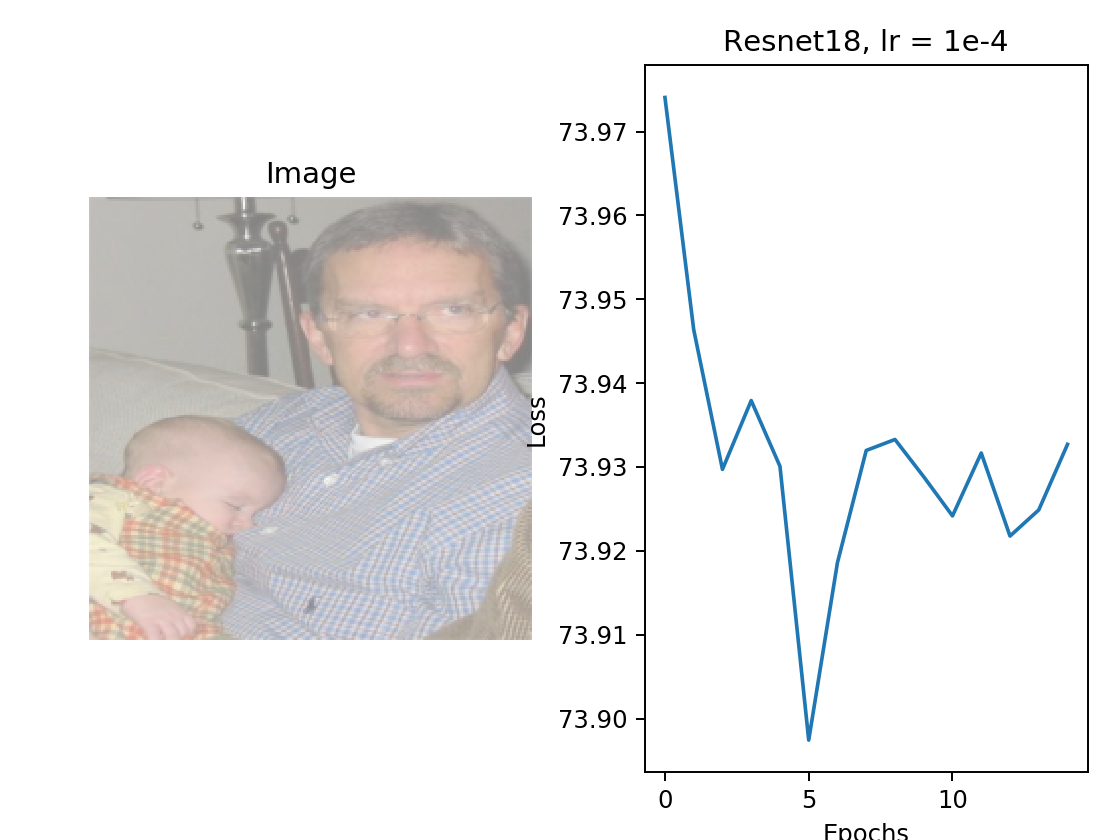

Start/Continue training from epoch 15
Finish training for 15 epochs


Text(0.5, 9.444444444444459, 'Epochs')

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp_resnet4.run(num_epochs=15,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))
ax2.set_title('Resnet18, lr = 1e-4')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')


In [7]:
## Try transferring lr=1e-4 net to a new experiment with lr=1e-5

# First, make space on the GPU by moving the old net off
#resnet4.to('cpu')

lr=1e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
oldnet = exp_resnet4.setting()['Net']
resnet5 = model.Resnet18Custom(oldnet, num_classes=20,n_batch=4)

## UNCOMMENT the following line if training.  Leave comment if loading trained network.
## Do this so that the GPU is left free for subsequent nets to train.
resnet5.to(device)

adam=torch.optim.Adam(resnet5.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp_resnet5=nt.Experiment(resnet5,train_set,valid_set,adam,stats_manager,batch_size=16,output_dir="runcustom5",perform_validation_during_training=False)

cuda


<IPython.core.display.Javascript object>


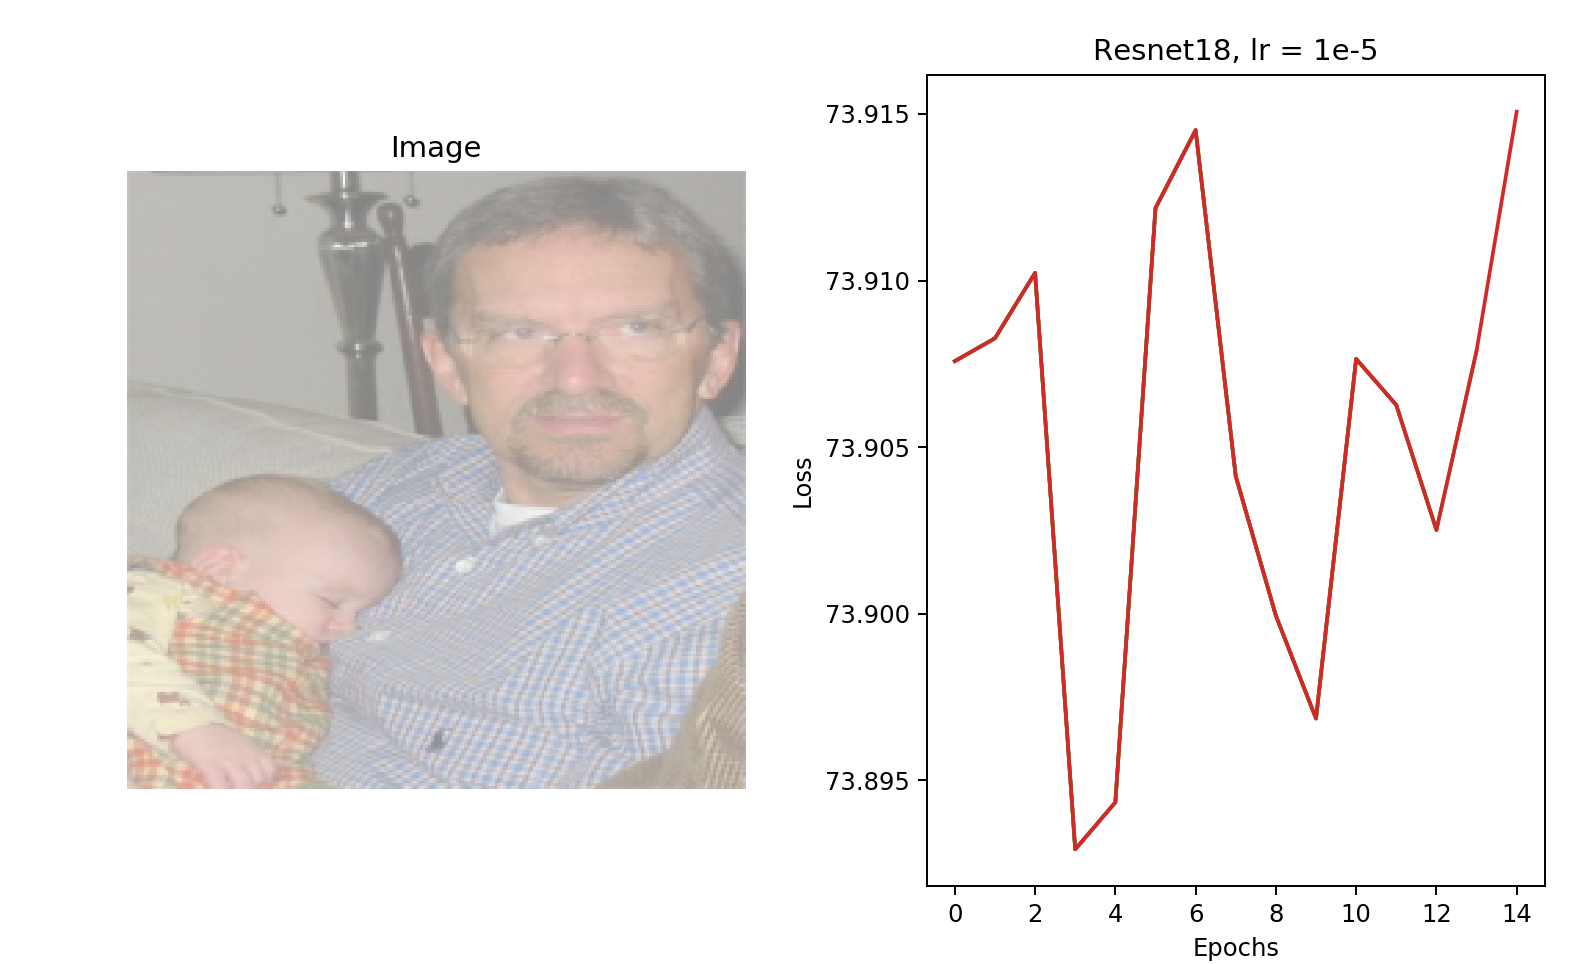

Start/Continue training from epoch 12


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 13 (Time: 235.18s)
Epoch 14 (Time: 227.13s)
Epoch 15 (Time: 225.96s)
Finish training for 15 epochs


Text(0.5, 9.444444444444459, 'Epochs')

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp_resnet5.run(num_epochs=15,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))
ax2.set_title('Resnet18, lr = 1e-5')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')

cuda
512


<IPython.core.display.Javascript object>


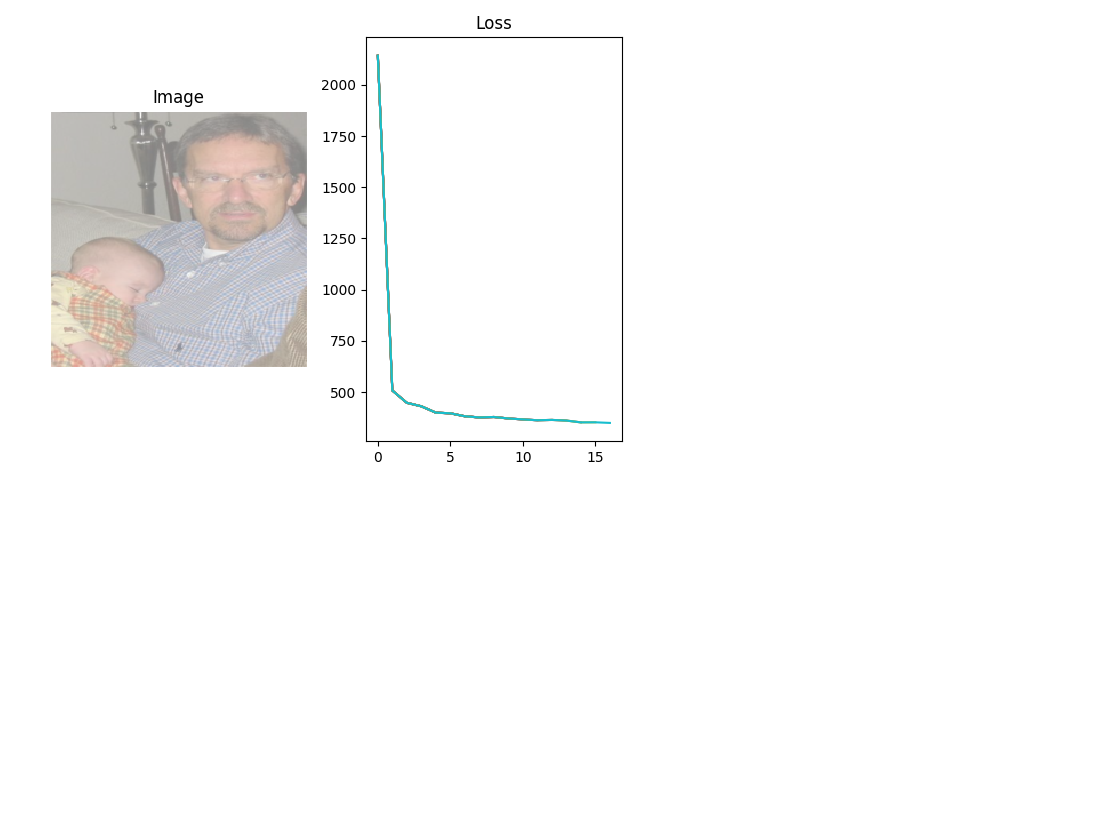

Start/Continue training from epoch 8


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 9 (Time: 191.02s)
Epoch 10 (Time: 193.60s)
Epoch 11 (Time: 188.37s)
Epoch 12 (Time: 186.90s)
Epoch 13 (Time: 186.97s)
Epoch 14 (Time: 188.80s)
Epoch 15 (Time: 187.70s)
Epoch 16 (Time: 191.83s)
Epoch 17 (Time: 191.19s)
Epoch 18 (Time: 187.44s)


In [ ]:
lr=1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp4=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runres4",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp4.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

In [ ]:
lr=1e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp5=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runres5",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp5.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

In [ ]:
lr=1e-6
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp6=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runres6",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp6.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

In [8]:
resnet34 = tv.models.resnet34(pretrained=True)
for name, param in resnet34.named_parameters():
    print(name, param.size(), param.requires_grad)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /datasets/home/42/542/deck/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 53673139.39it/s]


conv1.weight torch.Size([64, 3, 7, 7]) True
bn1.weight torch.Size([64]) True
bn1.bias torch.Size([64]) True
layer1.0.conv1.weight torch.Size([64, 64, 3, 3]) True
layer1.0.bn1.weight torch.Size([64]) True
layer1.0.bn1.bias torch.Size([64]) True
layer1.0.conv2.weight torch.Size([64, 64, 3, 3]) True
layer1.0.bn2.weight torch.Size([64]) True
layer1.0.bn2.bias torch.Size([64]) True
layer1.1.conv1.weight torch.Size([64, 64, 3, 3]) True
layer1.1.bn1.weight torch.Size([64]) True
layer1.1.bn1.bias torch.Size([64]) True
layer1.1.conv2.weight torch.Size([64, 64, 3, 3]) True
layer1.1.bn2.weight torch.Size([64]) True
layer1.1.bn2.bias torch.Size([64]) True
layer1.2.conv1.weight torch.Size([64, 64, 3, 3]) True
layer1.2.bn1.weight torch.Size([64]) True
layer1.2.bn1.bias torch.Size([64]) True
layer1.2.conv2.weight torch.Size([64, 64, 3, 3]) True
layer1.2.bn2.weight torch.Size([64]) True
layer1.2.bn2.bias torch.Size([64]) True
layer2.0.conv1.weight torch.Size([128, 64, 3, 3]) True
layer2.0.bn1.weight t

cuda
512


<IPython.core.display.Javascript object>


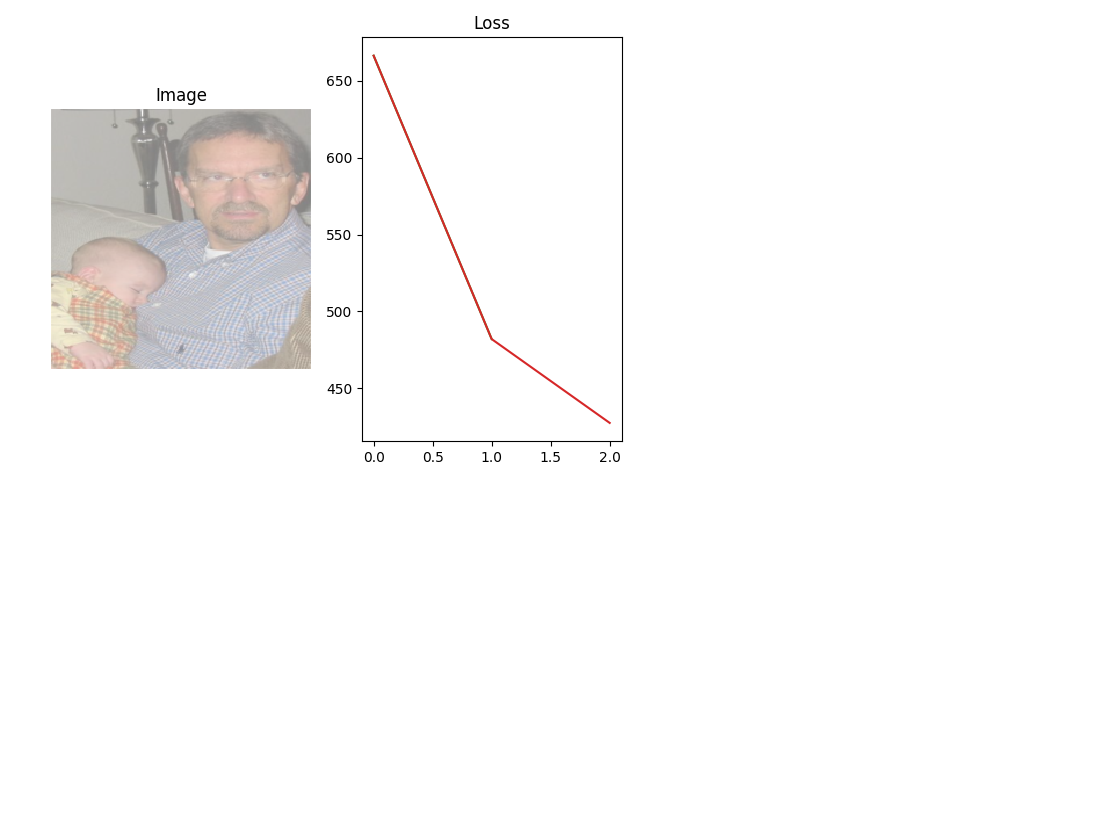

Start/Continue training from epoch 0


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 1 (Time: 197.69s)
Epoch 2 (Time: 190.49s)
Epoch 3 (Time: 188.22s)
Epoch 4 (Time: 186.51s)


KeyboardInterrupt: 

In [3]:
lr=1e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Untrained(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp3=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runresrawmid",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp3.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

cuda
512


<IPython.core.display.Javascript object>


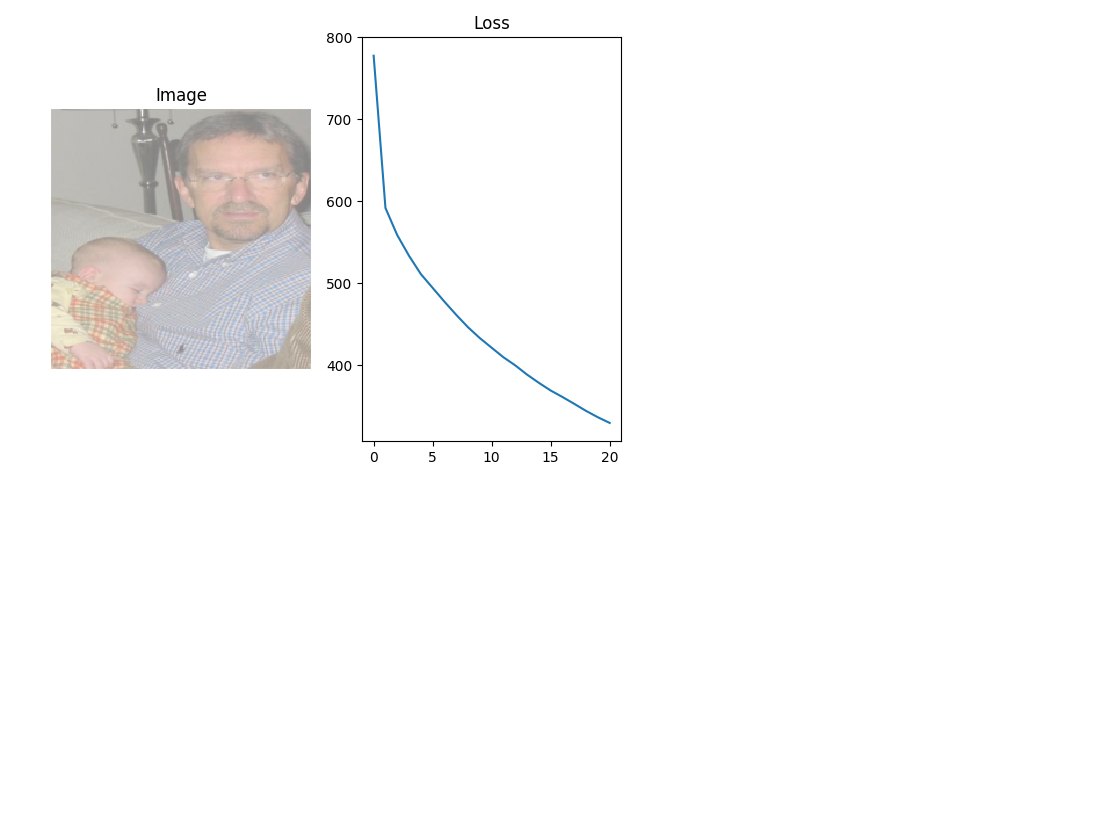

Start/Continue training from epoch 21


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


KeyboardInterrupt: 

In [2]:
lr=1e-6
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Untrained(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp2=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runresraw",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp2.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

In [4]:
## Try transferring lr=1e-3 net to a new experiment with lr=1e-4

# First, make space on the GPU by moving the old net off
#resnet3.to('cpu')

lr=1e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
oldnet = exp_resnet3.setting()['Net']
resnet5 = model.Resnet18Custom(oldnet, num_classes=20,n_batch=4)

## UNCOMMENT the following line if training.  Leave comment if loading trained network.
## Do this so that the GPU is left free for subsequent nets to train.
#resnet5.to(device)

adam=torch.optim.Adam(resnet5.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp_resnet5=nt.Experiment(resnet5,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runresnewloss5",perform_validation_during_training=False)

cuda


<IPython.core.display.Javascript object>


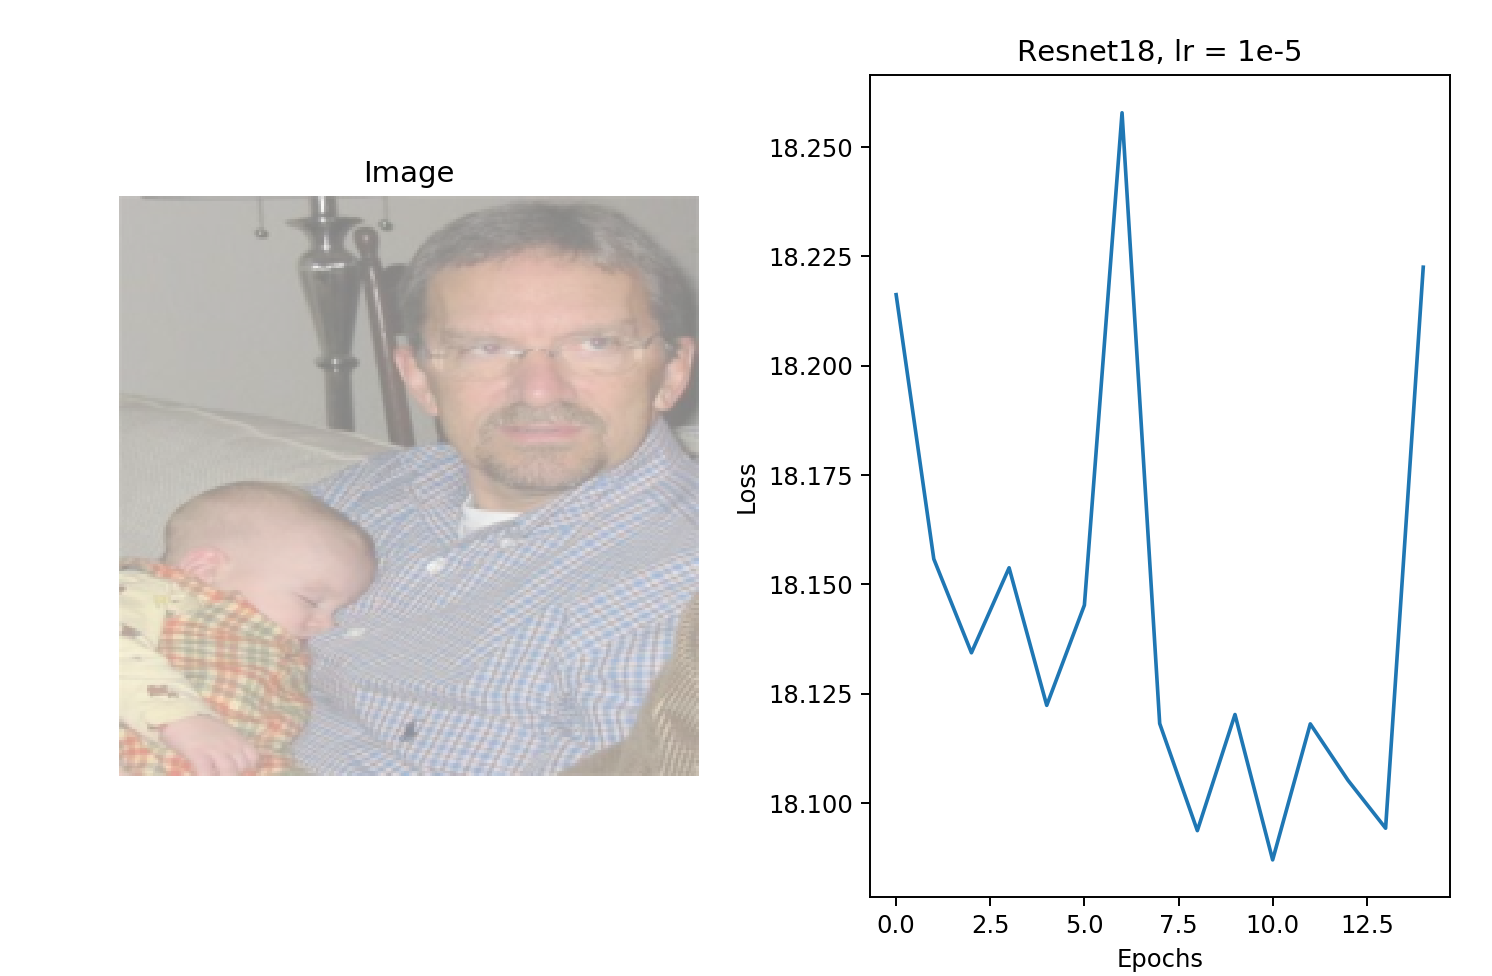

Start/Continue training from epoch 15
Finish training for 15 epochs


Text(0.5, 9.444444444444459, 'Epochs')

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp_resnet5.run(num_epochs=15,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))
ax2.set_title('Resnet18, lr = 1e-5')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')

In [6]:
lr=1e-6
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
oldnet = exp_resnet5.setting()['Net']
resnet6 = model.Resnet18Custom(oldnet, num_classes=20,n_batch=4)

## UNCOMMENT the following line if training.  Leave comment if loading trained network.
## Do this so that the GPU is left free for subsequent nets to train.
resnet6.to(device)

adam=torch.optim.Adam(resnet6.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp_resnet6=nt.Experiment(resnet6,train_set,valid_set,adam,stats_manager,batch_size=64,output_dir="runresnewloss6",perform_validation_during_training=False)

cuda


<IPython.core.display.Javascript object>


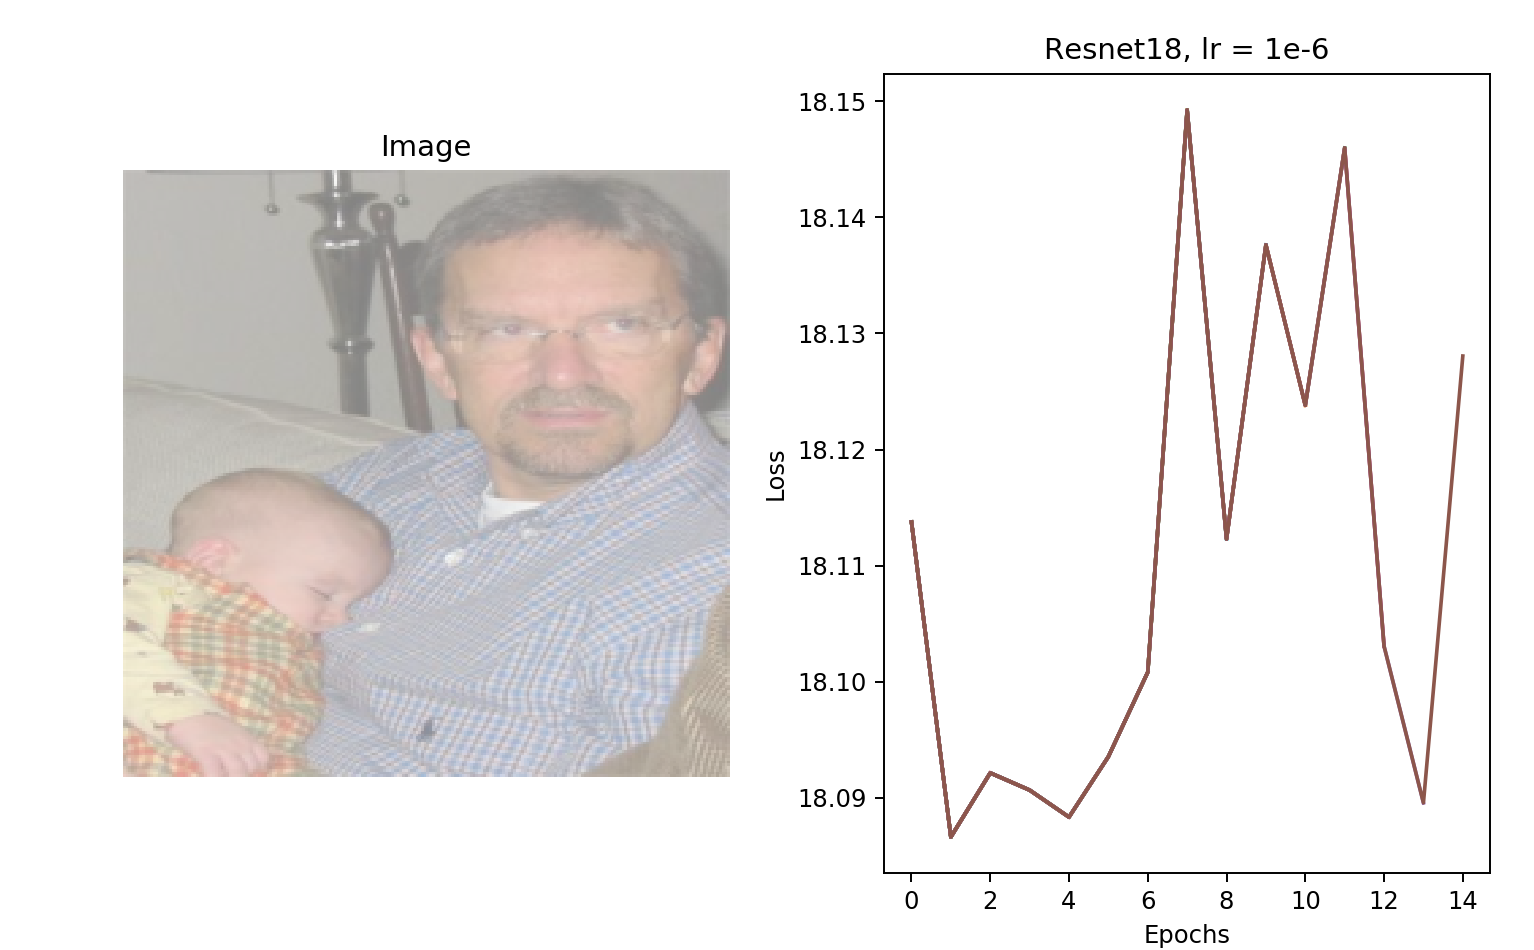

Start/Continue training from epoch 0


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 1 (Time: 207.92s)
Epoch 2 (Time: 199.60s)
Epoch 3 (Time: 205.08s)
Epoch 4 (Time: 202.16s)
Epoch 5 (Time: 196.93s)
Epoch 6 (Time: 200.23s)
Epoch 7 (Time: 205.35s)
Epoch 8 (Time: 200.51s)
Epoch 9 (Time: 199.55s)
Epoch 10 (Time: 196.80s)
Epoch 11 (Time: 200.93s)
Epoch 13 (Time: 202.96s)
Epoch 14 (Time: 201.53s)
Epoch 15 (Time: 198.75s)
Finish training for 15 epochs


Text(0.5, 9.444444444444459, 'Epochs')

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp_resnet6.run(num_epochs=15,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))
ax2.set_title('Resnet18, lr = 1e-6')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')